# Stationarity and Differencing

This notebook covers some preliminary concepts needed when using ARIMA models.

## Stationarity

A **stationary** time series is one whose statistical properties do not depend on the time at which the series is observed. 

More precisely, we say that $\{y_t\}$ is a stationary time series if the joint distribution of $(y_t, y_{t+1}, \ldots, y_{t+s})$ does not depend on $t$.

More intuitively, time series with *trends* or *seasonality* are not stationary.

### Seasonality vs Cycles

Sometimes, **cyclic behavior can be mistaken for seasonality**. 

Seasonality is characterized by fixed periodic re-occurences, while cycles are not of a fixed length (the peaks and troughs do not occur at regular intervals).

**A time series with cyclic behavior (but with no trend and seasonality) is stationary.**
<br>(note: trend can be linear or exponential)

![stationary](stationary.png)

Which of these time series are stationary?

## Autocorrelation

If we treat $k$ as a functional input to the expression above, we call the resulting function the **autocorrelation function** (ACF), which we can plot.

The resulting plot is also called a *correlogram*.

**Autocorrelation** measures the linear relationship between lagged values of a time series (similar to regular correlation),

$$r_k = \frac{\sum_{t=k+1}^{T} (y_t - \bar{y})(y_{t-k} - \bar{y})}{\sum_{t=1}^{T} (y_t - \bar{y})^2}$$

For example, $r_1$ measures the relationship between $y_t$ and $y_{t-1}$, $r_2$ measures the relationship between $y_t$ and $y_{t-2}$, and so on.

### ACF Plot

If we treat $k$ as a functional input to the expression above, we call the resulting function the **autocorrelation function** (ACF), which we can plot.

The resulting plot is also called a *correlogram*.

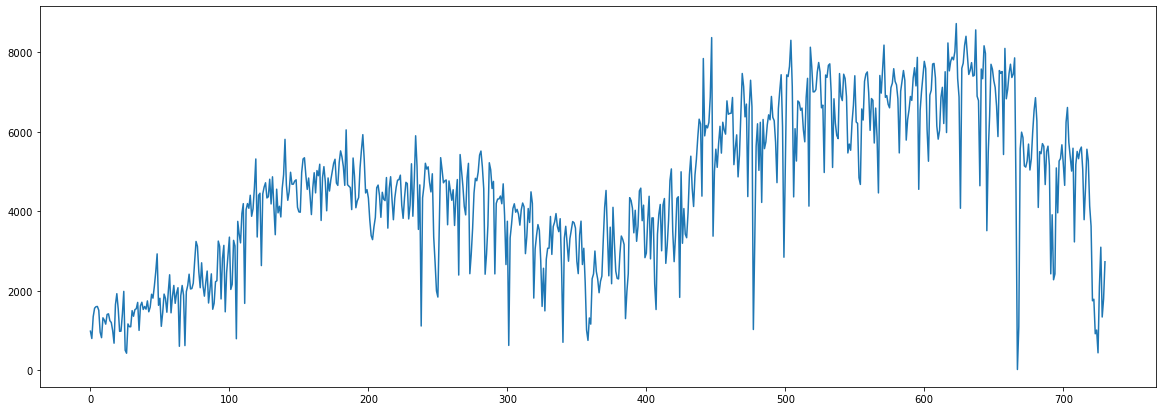

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20,7)

ts = pd.read_excel('Bike_Sharing.xlsx')['count']
ts.plot()
plt.show()

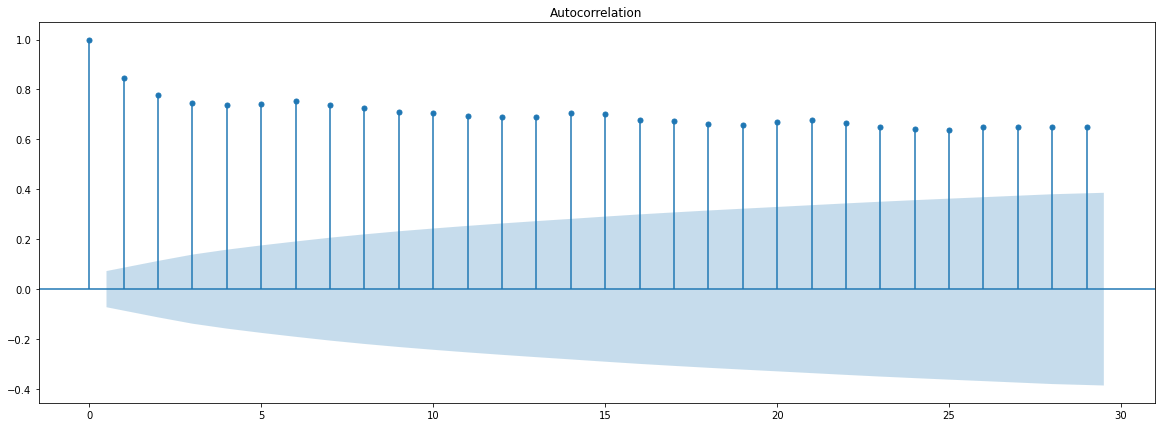

In [2]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts) # can specify zero=False, lags=180 . check docu
plt.show()

Lets use hourly data

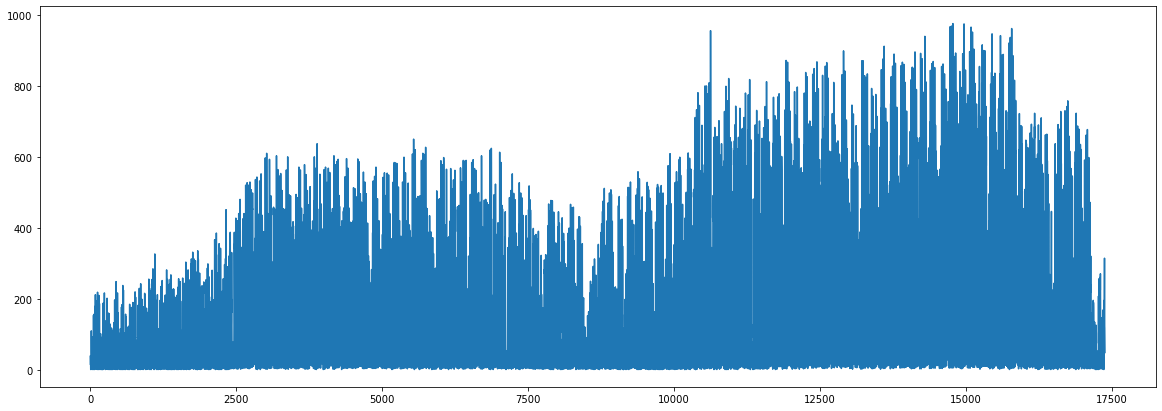

In [3]:
ts_hour = pd.read_csv('bike_sharing_hour.csv')['cnt']
ts_hour.plot()
plt.show()

Hourly Data for 2 weeks. Seasonality is apparent. 24 hour and 7 day seasonality. Peak is at 1 day. Peak is at 7 day. 

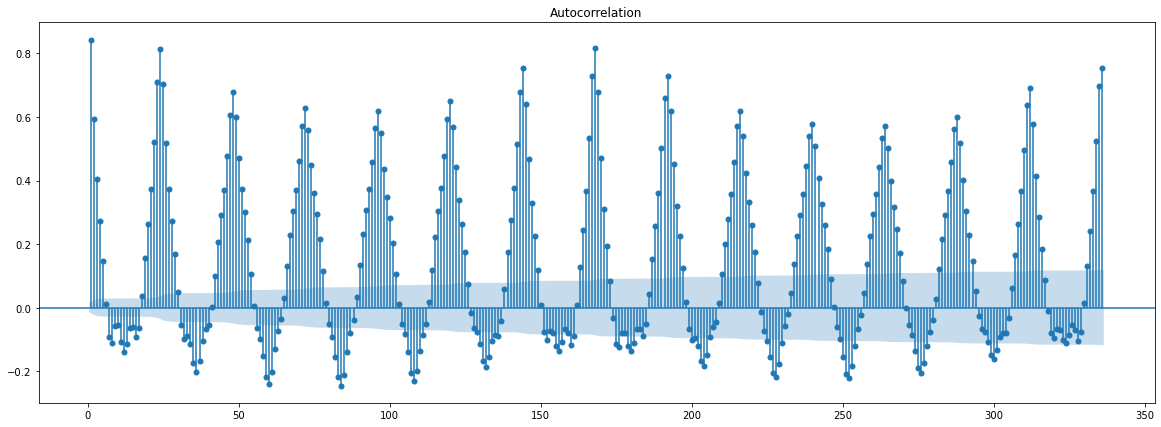

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts_hour, zero=False, lags=14*24)
plt.show()

When the series has a trend, the autocorrelations tend to be large and positive for small lags. The ACF also tends to decrease slowly.

When the series is seasonal, autocorrelations will be larger at the seasonal lags.

When the series has both trend and seasonality, you see a combination of these effects.

## Differencing

One-way to make a time series stationary is to use **differencing**,

$$y_t' = y_t - y_{t-1}$$

Note that the differenced series will have only $T-1$ values, since you can't calculate $y'_1$.

### Seasonal Differencing

If you speculate that your data has seasonality, do seasonal differencing first. If it is still not stationary, try first differencing.

**Seasonal differencing** (also called lag-$m$ differencing) is a generalization of the first-order differencing shown above,

$$y_t' = y_t - y_{t-m}$$

where $m$ is the observed number of seasons.

Sometimes it is necessary to take both a seasonal diference and a first difference to get a stationary series.

**Some final notes:**

1. Sometimes it is necessary to take <u>both a seasonal diference and a first difference</u> to get a stationary series.

2. The order in which you <u>apply seasonal and first differences doesn't matter</u>.

3. Applying more differences than required can sometimes induce false dynamics/autocorrelations. <u>Minimize the number of differences performed</u>.

4. <u>Applying a log transform</u> can help stabilize the variance of a time series.

## Tests of Stationarity

To check for stationarity more formally, we can use a hypothesis test.

The two most commonly used tests for stationarity are **Augmented Dickey-Fuller** (ADF) and **Kwiatkowski-Phillips-Schmidt-Shin** (KPSS).

In the ADF test, the null hypothesis is that the series is <u>non-stationary</u>. **we want to reject null**

In the KPSS test, the null hypothesis is that the series is <u>stationary</u>. **we dont want to reject null**

Therefore:

1. For ADF, low p-value implies series is probably stationary.

2. For KPSS, high p-value implies series is probably stationary.

*Note: The KPSS test in statsmodels will throw a warning if the p-value > 0.1, but it implies series is **probably stationary**.*

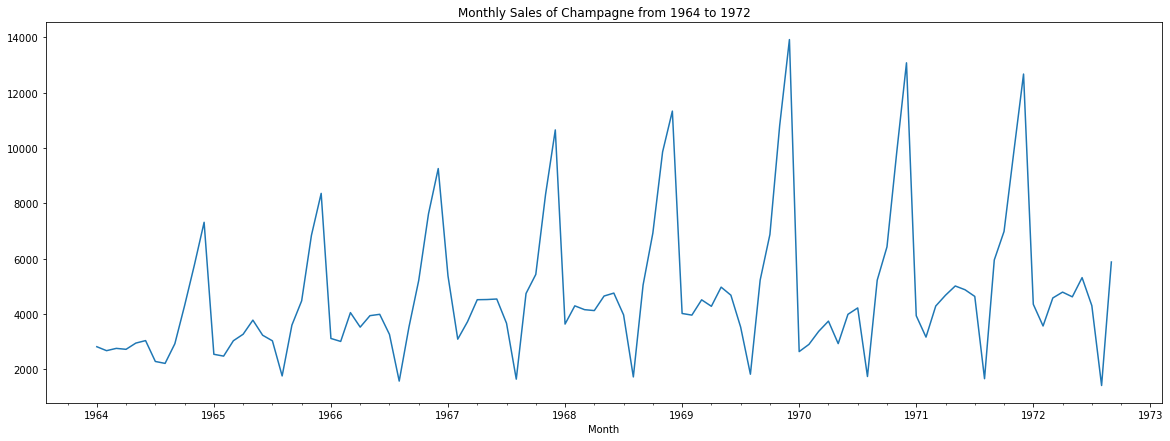

In [5]:
df = pd.read_csv('champagne.csv', index_col=0).iloc[:-2,-1]
df.index = pd.PeriodIndex(df.index, dtype='period[M]')
# df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72': 'Sales'})
df
ts_champ = df

ax = ts_champ.plot()
ax.autoscale()
ax.set_title('Monthly Sales of Champagne from 1964 to 1972')
plt.show()

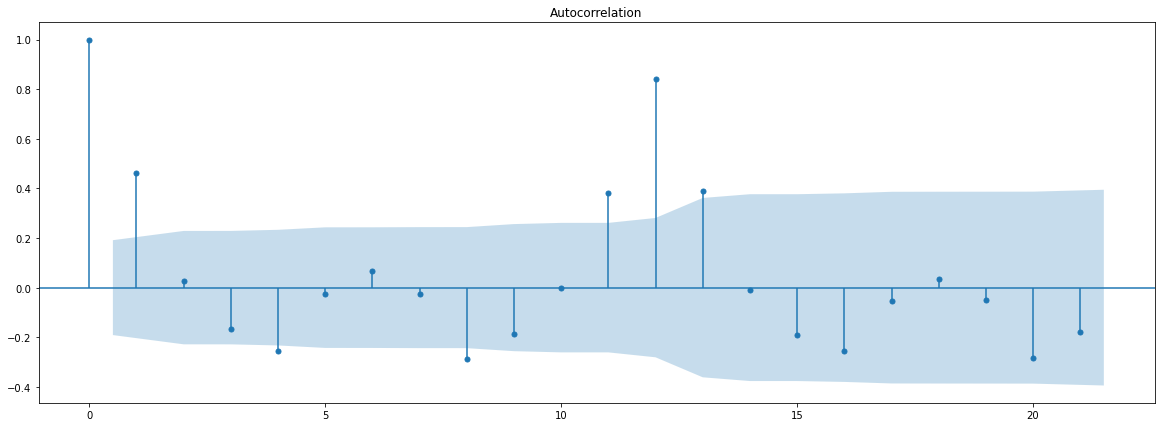

In [6]:
plot_acf(ts_champ)
plt.show()

In [7]:


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def adf_test(ts):
    res = adfuller(ts)
    print('ADF = %f' % res[0])
    print('p-value = %f' % res[1])
    print('Critical Values:')
    for k, v in res[4].items():
        print('\t%s: %.3f' % (k, v))
        
def kpss_test(ts):
    res = kpss(ts, nlags='auto')
    print('KPSS = %f' % res[0])
    print('p-value = %f' % res[1])
    print('Critical Values:')
    for k, v in res[3].items():
        print('\t%s: %.3f' % (k, v))
        
adf_test(ts_champ)
print()
kpss_test(ts_champ)

ADF = -1.833593
p-value = 0.363916
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584

KPSS = 0.512672
p-value = 0.038813
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


ADF p-value indicates it is not stationary. 

Log transformation of your data might help in making it stationary. But you will see in this case, we need not log transform. Look at p-value of ADF test.

In [ ]:


ts_champ_log = np.log(ts_champ)
ax = ts_champ_log.plot()
ax.autoscale()
ax.set_title('Logged Monthly Sales of Champagne from 1964 to 1972')
plt.show()

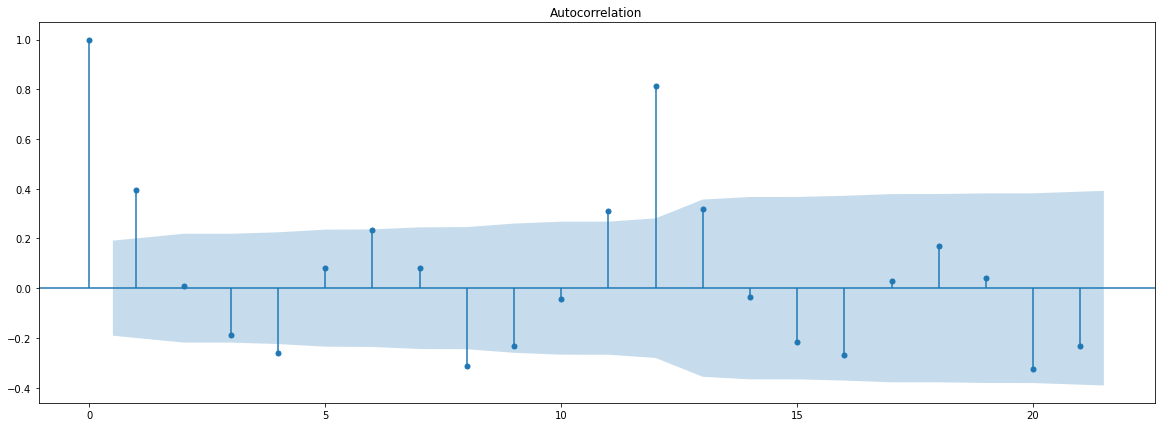

In [20]:
plot_acf(ts_champ_log)
plt.show()

In [22]:
adf_test(ts_champ_log)

ADF = -2.255119
p-value = 0.186852
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584


We can see that the p-value decreased but still indicates non-stationarity. By differencing we shall see if it makes any improvement. First we do differencing on the logged data. Then the original data. Spoiler ---> both will succeed in making our data stationary. However, not logging the data apparently does a better job.

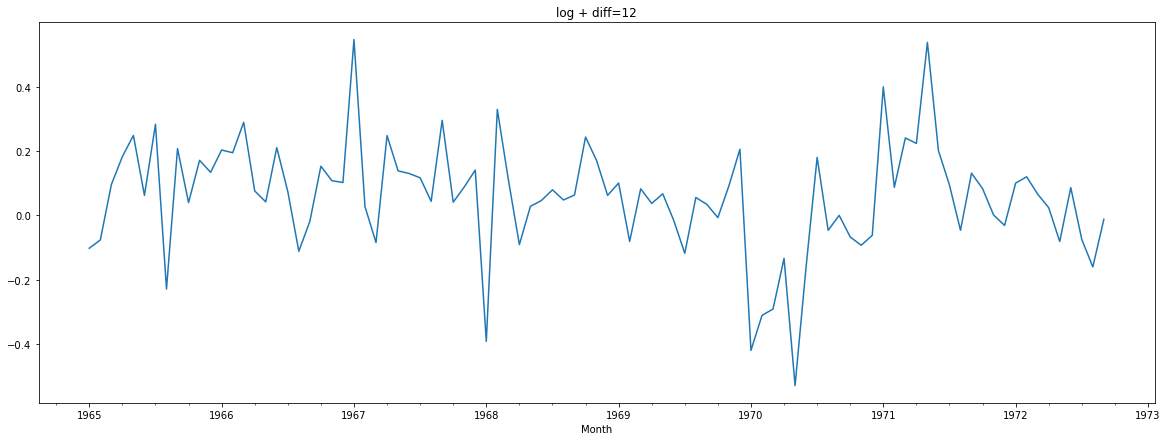

ADF = -3.617321
p-value = 0.005438
Critical Values:
	1%: -3.505
	5%: -2.894
	10%: -2.584

KPSS = 0.310519
p-value = 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\JG\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [23]:
m = 12
ts_log_diff = ts_champ_log.diff(m)[m:]
ax = ts_log_diff.plot()
ax.autoscale()
ax.set_title('log + diff=%d' % m)
plt.show()

adf_test(ts_log_diff)
print()
kpss_test(ts_log_diff)

The ADF p-value is significant at the 1% level (less than 0.001) which indicates our data is now stationary. Now lets do differencing on the original data.

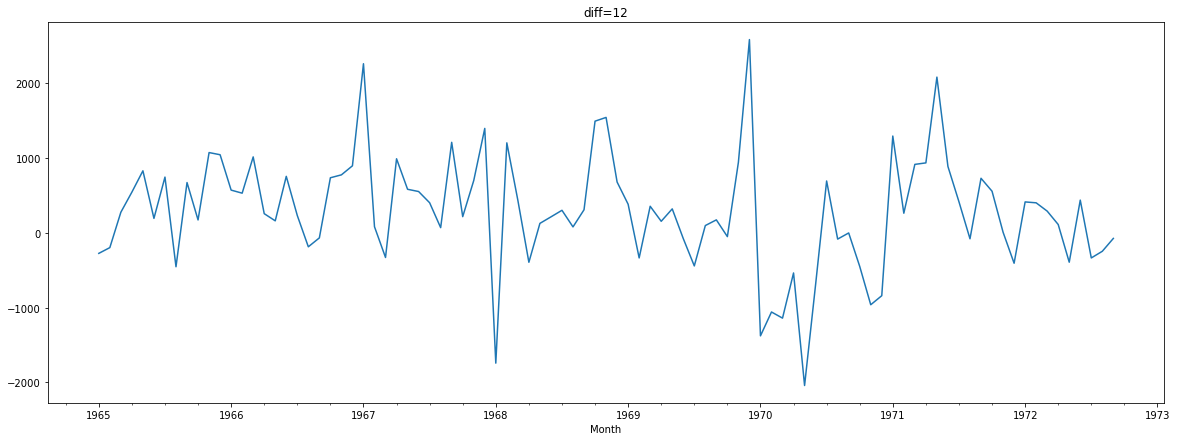

ADF = -7.626619
p-value = 0.000000
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584

KPSS = 0.294397
p-value = 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\JG\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [24]:
m = 12
ts_diff = ts_champ.diff(m)[m:]
ax = ts_diff.plot()
ax.autoscale()
ax.set_title('diff=%d' % m)
plt.show()

adf_test(ts_diff)
print()
kpss_test(ts_diff)

As mentioned earlier, not having to perform log transformation yields a better ADF p-value of 0.000. This indicates that the data is now stationary.